<h2 style='color:blue' align='center'>Transfer learning in image classification</h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand**

In [ ]:
# Install tensorflow_hub using pip install tensorflow_hub first

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
print("TensorFlow version:", tf.__version__)

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')
if gpu_available:
    print("GPU:", gpu_available[0])
else:
    print("GPU not available.")

TensorFlow version: 2.15.0
GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


**Make predictions using ready made model (without any training)**

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

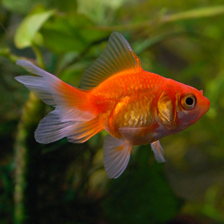

In [ ]:
gold_fish = Image.open("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [ ]:
# adding one more dimension
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [ ]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result

1/1 [==============================] - 4s 4s/step


array([[ 0.22101447,  2.047492  ,  9.622561  , ..., -1.4621571 ,
        -0.28146517, -0.25984728]], dtype=float32)

In [ ]:
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

<h3 style='color:purple'>Load flowers dataset</h3>

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [ ]:
data_dir

'/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/tulips/4042180234_64cd2859c9_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/tulips/17165583356_38cb1f231d_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/tulips/5208680166_c4372477ef_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/tulips/8562853756_73778dac25_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/tulips/8708856019_f3be2353a4_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/roses/7551637034_55ae047756_n.jpg')]

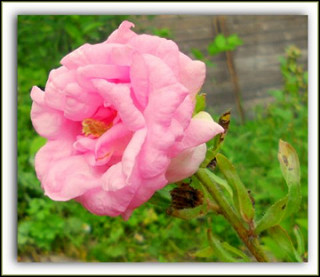

In [ ]:
import PIL
PIL.Image.open(str(roses[1]))

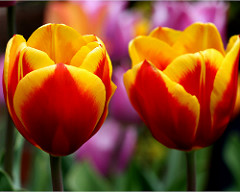

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/roses/7345657862_689366e79a.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/roses/7551637034_55ae047756_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'/content/drive/MyDrive/Colab Notebooks/Deep Learning/Transfer Learning/datasets/flower_photos/roses/7345657862_689366e79a.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(322, 500, 3)

In [ ]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Make prediction using pre-trained model on new flowers dataset**

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
# IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
# x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
# x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
# x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

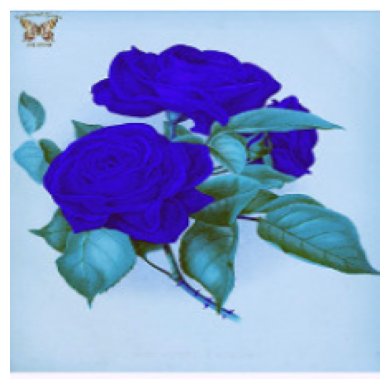

In [ ]:
plt.axis('off')
plt.imshow(X[0])

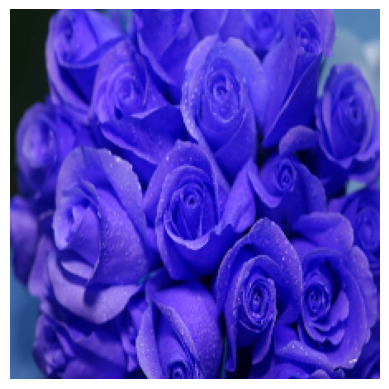

In [ ]:
plt.axis('off')
plt.imshow(X[1])

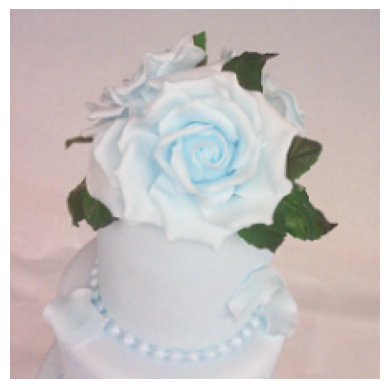

In [ ]:
plt.axis('off')
plt.imshow(X[2])

In [ ]:
# predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 610ms/step


array([722, 795, 795])

In [ ]:
image_labels[795]

'shower curtain'

<h3 style='color:purple'>Now take pre-trained model and retrain it using flowers images</h3>

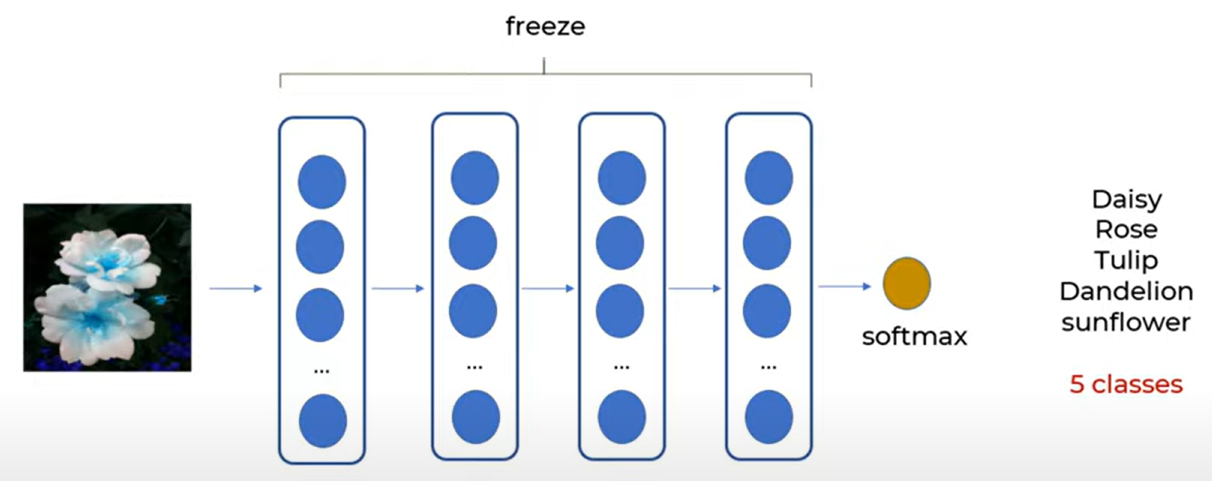

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    # trainable=False -- Do not train, freeze
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer, # frozen layer
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 0.3703 - acc: 0.8682


[0.37029528617858887, 0.8681917190551758]